# Task 2: Credit Card Fraud Detection
* Build a model to detect fraudulent credit card transactions. Use a dataset containing information about credit card transactions, and experiment with algorithms like Logistic Regression, Decision Trees, or Random Forests to classify transactions as fraudulent or legitimate.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
train_df = pd.read_csv("fraudTrain.csv")
test_df = pd.read_csv("fraudTest.csv")

In [3]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [5]:
train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
print(train_df['is_fraud'].value_counts())

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


In [8]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3356\3623846825.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar=sns.countplot(x='is_fraud',data=train_df, palette = 'pastel')


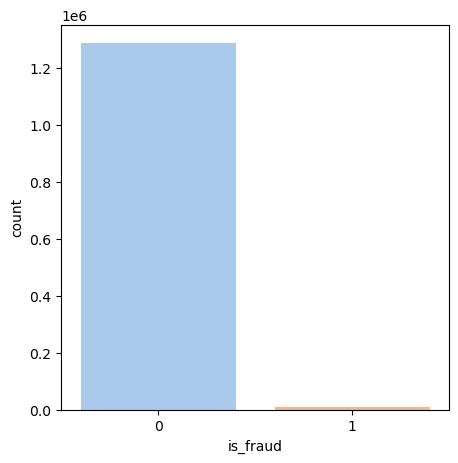

In [9]:
plt.figure(figsize=(5,5))
bar=sns.countplot(x='is_fraud',data=train_df, palette = 'pastel')
plt.show(bar)

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

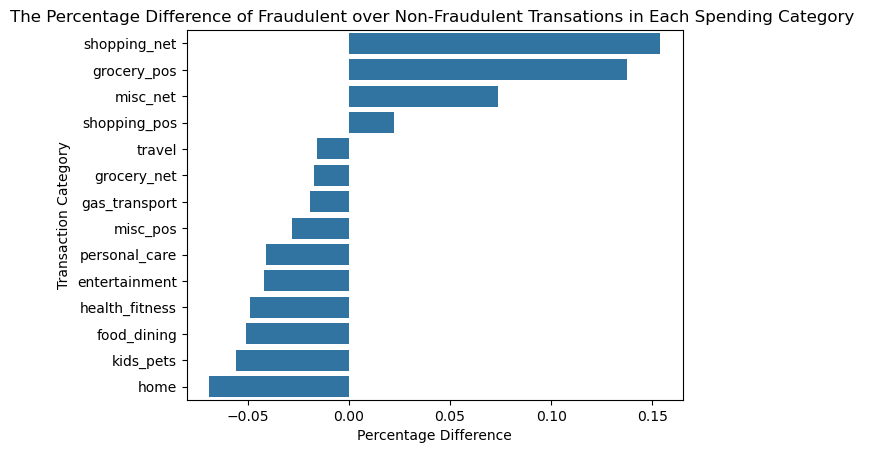

In [10]:
not_fraud=train_df[train_df['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
not_fraud.columns=['category','not fraud percentage']

fraud=train_df[train_df['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
fraud.columns=['category','fraud percentage']
Total=not_fraud.merge(fraud,on='category')
Total['diff']=Total['fraud percentage']-Total['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=Total.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

# Preprocessing

### Handle Date-Time

In [11]:
train_df["trans_date_trans_time"]=pd.to_datetime(train_df["trans_date_trans_time"])
train_df["dob"]=pd.to_datetime(train_df["dob"])
train_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [12]:
test_df["trans_date_trans_time"]=pd.to_datetime(test_df["trans_date_trans_time"])
test_df["dob"]=pd.to_datetime(test_df["dob"])
test_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


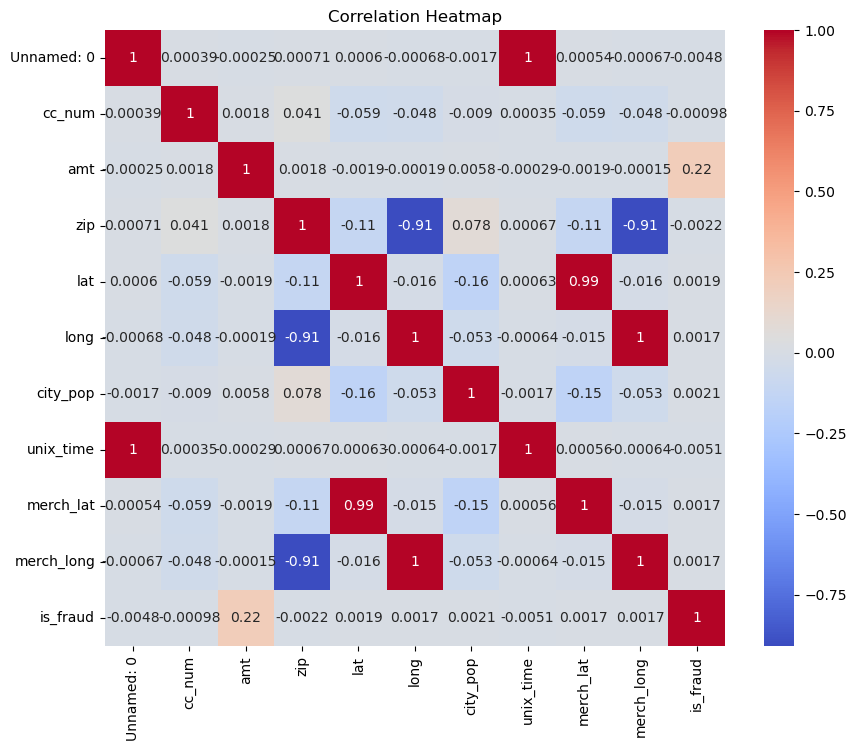

In [13]:
plt.figure(figsize=(10, 8))
correlation_matrix = train_df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
#drop columns that are not relevant to predicy fraud transaction
drop_columns = ['Unnamed: 0','cc_num','trans_num','unix_time',
               'first','last','street','zip','trans_date_trans_time','city',
               'lat','long','dob','merch_lat','merch_long','state']
train_df.drop(columns=drop_columns,inplace=True)
test_df.drop(columns=drop_columns,inplace=True)

print(train_df.head())
train_df.shape

                             merchant       category     amt gender  city_pop  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97      F      3495   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F       149   
2                fraud_Lind-Buckridge  entertainment  220.11      M      4154   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M      1939   
4                 fraud_Keeling-Crist       misc_pos   41.96      M        99   

                                 job  is_fraud  
0          Psychologist, counselling         0  
1  Special educational needs teacher         0  
2        Nature conservation officer         0  
3                    Patent attorney         0  
4     Dance movement psychotherapist         0  


(1296675, 7)

In [15]:
print(test_df.head())
test_df.shape

                               merchant        category    amt gender  \
0                 fraud_Kirlin and Sons   personal_care   2.86      M   
1                  fraud_Sporer-Keebler   personal_care  29.84      F   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28      F   
3                     fraud_Haley Group        misc_pos  60.05      M   
4                 fraud_Johnston-Casper          travel   3.19      M   

   city_pop                     job  is_fraud  
0    333497     Mechanical engineer         0  
1       302  Sales professional, IT         0  
2     34496       Librarian, public         0  
3     54767            Set designer         0  
4      1126      Furniture designer         0  


(555719, 7)

### Handle Data Imbalance

In [16]:
encoder = LabelEncoder()
train_df["gender"]=encoder.fit_transform(train_df["gender"])
test_df["gender"]=encoder.fit_transform(test_df["gender"])

train_df["category"]=encoder.fit_transform(train_df["category"])
test_df["category"]=encoder.fit_transform(test_df["category"])

train_df["job"]=encoder.fit_transform(train_df["job"])
test_df["job"]=encoder.fit_transform(test_df["job"])

train_df["merchant"]=encoder.fit_transform(train_df["merchant"])
test_df["merchant"]=encoder.fit_transform(test_df["merchant"])

train_df['amt'] = train_df['amt'].astype(int)

# Fill missing values
train_df.fillna(-999, inplace=True)
test_df.fillna(-999, inplace=True)
test_df.fillna(-999,inplace=True)
test_df.fillna(-999,inplace=True)

# Drop rows containing -999 in train_df
train_df = train_df[train_df != -999].dropna()

# Drop rows containing -999 in test_df
test_df = test_df[test_df != -999].dropna()

### Split Train and Test Data

In [17]:
X_train = train_df.drop('is_fraud',axis=1)
y_train = train_df['is_fraud']

train_df.head()

,merchant,category,amt,gender,city_pop,job,is_fraud
0,514,8,4,0,3495,370,0
1,241,4,107,0,149,428,0
2,390,0,220,1,4154,307,0
3,360,2,45,1,1939,328,0
4,297,9,41,1,99,116,0


In [18]:
X_test=test_df.drop('is_fraud',axis=1)
y_test = test_df['is_fraud']

test_df.head()

,merchant,category,amt,gender,city_pop,job,is_fraud
0,319,10,2.86,1,333497,275,0
1,591,10,29.84,0,302,392,0
2,611,5,41.28,0,34496,259,0
3,222,9,60.05,1,54767,407,0
4,292,13,3.19,1,1126,196,0


## EDA

2


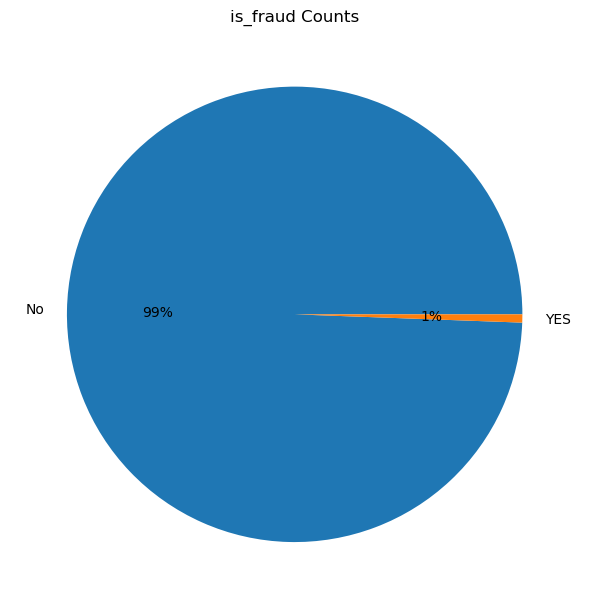

In [19]:
exit_counts = train_df["is_fraud"].value_counts()
print(len(exit_counts))
plt.figure(figsize=(12, 6))
labels=["No","YES"]
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(exit_counts,labels=labels, autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [20]:
print(X_train.dtypes)
print(y_train.dtypes)

merchant    int64
category    int64
amt         int64
gender      int64
city_pop    int64
job         int64
dtype: object
int64


## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

cla=RandomForestClassifier(n_estimators=100,random_state=42)
cla.fit(X_train,y_train)

y_pred=cla.predict(X_test)

report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)
print("Classification Report : \n",report)

Accuracy:  0.9975581184015663
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.72      0.59      0.65      2145

    accuracy                           1.00    555719
   macro avg       0.86      0.80      0.83    555719
weighted avg       1.00      1.00      1.00    555719



## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

classification = DecisionTreeClassifier(random_state=42)
classification.fit(X_train,y_train)

y_pred=classification.predict(X_test)

report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)
print("Classification Report : \n",report)

Accuracy:  0.9952961838627076
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.42      0.58      0.49      2145

    accuracy                           1.00    555719
   macro avg       0.71      0.79      0.74    555719
weighted avg       1.00      1.00      1.00    555719



## Confusion Matrix

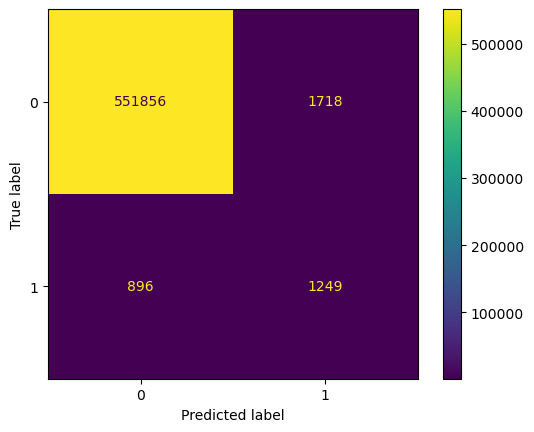

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## ROV curve

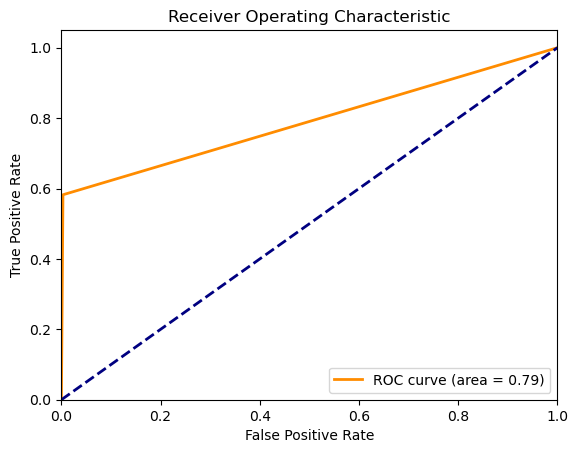

AUC: 0.7895904564147654


In [24]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)